https://keras.io/examples/imdb_lstm/

In [ ]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Dropout
from tensorflow.keras.datasets import imdb

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:


max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, mask_zero=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 100)         91600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,681,851
Trainable params: 2,681,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])



In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_acc', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - 349s 438ms/step - loss: 0.4230 - acc: 0.8012 - val_loss: 0.3584 - val_acc: 0.8417
Epoch 2/15
782/782 [==============================] - 26s 34ms/step - loss: 0.4090 - acc: 0.8132
Test score: 0.4090372323989868
Test accuracy: 0.8131600022315979


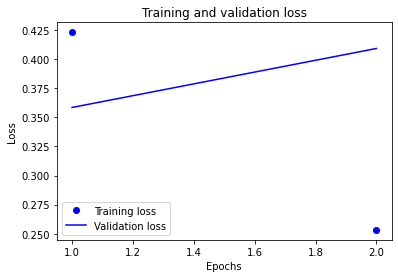

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

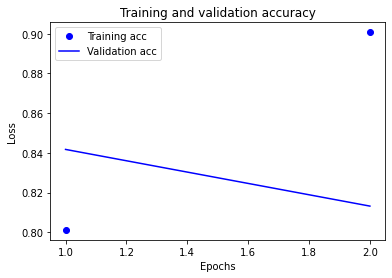

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# BiLSTM

In [ ]:

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 80, 128)           2560000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_accuracy', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - 17s 18ms/step - loss: 0.4201 - accuracy: 0.8011 - val_loss: 0.3842 - val_accuracy: 0.8307
Epoch 2/15
782/782 [==============================] - 4s 6ms/step - loss: 0.3726 - accuracy: 0.8323
Test score: 0.37262627482414246
Test accuracy: 0.8322799801826477


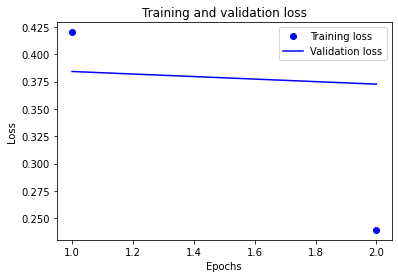

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

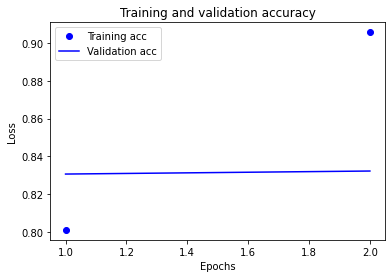

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# GRU

In [ ]:

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(GRU(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 80, 128)           2560000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,634,625
Trainable params: 2,634,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
print('Train...')

checkpoint = EarlyStopping(monitor='val_accuracy', mode='max')
callbacks_lst = [checkpoint]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=callbacks_lst)

history_dict = history.history
history_dict.keys()

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 [==============================] - 16s 17ms/step - loss: 0.4395 - accuracy: 0.7892 - val_loss: 0.3621 - val_accuracy: 0.8411
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 0.3591 - accuracy: 0.8424
Test score: 0.35906773805618286
Test accuracy: 0.8424400091171265


The dataset is actually too small for LSTM to be of any advantage compared to simpler, much faster methods such as TF-IDF + LogReg.

Notes

RNNs are tricky. Choice of batch size is important, choice of loss and optimizer is critical, etc. Some configurations won't converge.

LSTM loss decrease patterns during training can be quite different from what you see with CNNs/MLPs/etc.